In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import tempfile
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.mab_fcbai_learner import ExpGap, LilUCBHeuristic, TrackAndStop, BatchRacing
from banditpylib.utils import argmax_or_min_tuple, argmax_or_min, argmax_or_min_tuple_second

In [2]:
#means =  [0.7, 0.4, 0.1]
#means = [0.6, 0.5, 0.5]
#means = [0.5, 0.45, 0.43, 0.4] #w∗(µ1) = [0.417 0.390 0.136 0.057]
#means =  [0.6, 0.51, 0.5, 0.49, 0.48] #w∗(µ2) = [0.336, 0.251, 0.177, 0.132, 0.104]
#means =  [0.3, 0.21, 0.2, 0.19, 0.18] #w∗(µ2) = [0.336, 0.251, 0.177, 0.132, 0.104]

In [3]:
confidence = 0.95
means = [0.7, 0.4, 0.1]
max_pulls=50000
std=1

arms = [GaussianArm(mu=mean, std=std) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [
            #ExpGap(arm_num=len(arms), confidence=confidence, threshold=3,  name='Exponential-Gap Elimination'),
            BatchRacing(arm_num=len(arms), confidence=confidence, max_pulls=max_pulls, 
                            k=1, b=10, r=4, name='BatchRacing'),
            LilUCBHeuristic(arm_num=len(arms), confidence=confidence, max_pulls=max_pulls, name='Heuristic lilUCB')
#             TrackAndStop(arm_num=len(arms), confidence=confidence, tracking_rule="C", 
#                         max_pulls=max_pulls,  name='Track and stop C-Tracking'),
#             TrackAndStop(arm_num=len(arms), confidence=confidence, tracking_rule="D", 
#                         max_pulls=max_pulls,  name='Track and stop D-Tracking')
           
           ]

# For each setup, we run 20 trials
trials = 5
temp_file = tempfile.NamedTemporaryFile()

In [4]:
game = SinglePlayerProtocol(bandit=bandit, learners=learners)
# Start playing the game
# Add `debug=True` for debugging purpose
game.play(trials=trials, output_filename=temp_file.name)

INFO:absl:start BatchRacing's play with multi_armed_bandit
INFO:absl:BatchRacing's play with multi_armed_bandit runs 2.58 seconds.
INFO:absl:start Heuristic lilUCB's play with multi_armed_bandit


R_next:  {2}
R_next:  {1, 2}
A_next:  {0}
R_next:  {2}
R_next:  {1, 2}
A_next:  {0}
R_next:  {2}
R_next:  {1, 2}
A_next:  {0}
R_next:  {2}
R_next:  {1, 2}
A_next:  {0}
R_next:  {2}
R_next:  {1, 2}
A_next:  {0}


INFO:absl:Heuristic lilUCB's play with multi_armed_bandit runs 2.64 seconds.


In [5]:
trials_df = trials_to_dataframe(temp_file.name)

In [6]:
trials_df.tail(100)

,rounds,total_actions,regret,other,bandit,learner
0,93,860,0.0,0.0,multi_armed_bandit,BatchRacing
1,230,1956,0.0,0.0,multi_armed_bandit,BatchRacing
2,160,1370,0.0,0.0,multi_armed_bandit,BatchRacing
3,314,2660,0.0,0.0,multi_armed_bandit,BatchRacing
4,288,2438,0.0,0.0,multi_armed_bandit,BatchRacing
5,672,674,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
6,320,322,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
7,474,476,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
8,490,492,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
9,864,866,0.0,0.0,multi_armed_bandit,Heuristic lilUCB


In [7]:
trials_df['confidence'] = confidence

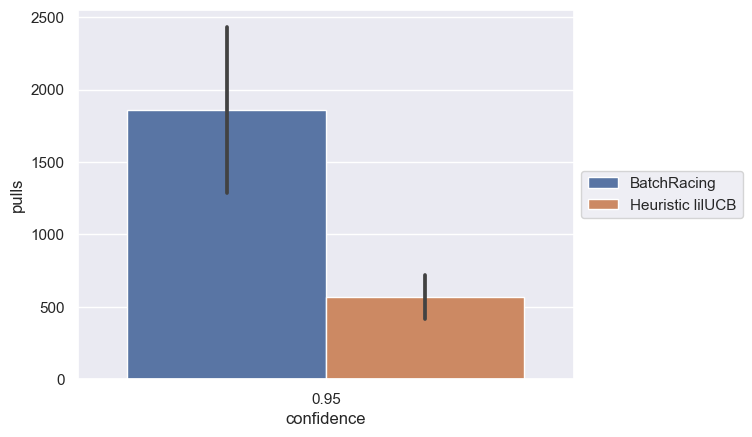

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=trials_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))